In [1]:
# packages to operations on array and dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# splitting dataset
from sklearn.model_selection import train_test_split

In [3]:
#computing accuracy score
from sklearn import metrics

In [4]:
#hypertuning parameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint as sp_randint

In [5]:
# importing boston datasets from inbuilt datasets sklearn
from sklearn.datasets import load_boston
boston_d = load_boston()
bost = pd.DataFrame(boston_d.data)
bost.columns = boston_d.feature_names
bost.columns = map(str.lower,bost.columns)
bost['price']=boston_d.target
bost.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007295827EC8>]],
      dtype=object)

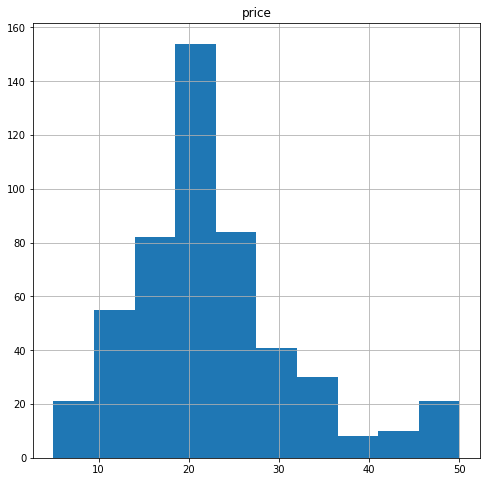

In [6]:
bost.hist(column='price',figsize=(8,8))

In [7]:
bost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
bost['price'].skew()

1.1080984082549072

In [9]:
bost['ln_price']=np.log(bost['price'])
bost.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price,ln_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,3.178054
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,3.072693
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,3.546740
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,3.508556
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,3.589059


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000007296000A48>]],
      dtype=object)

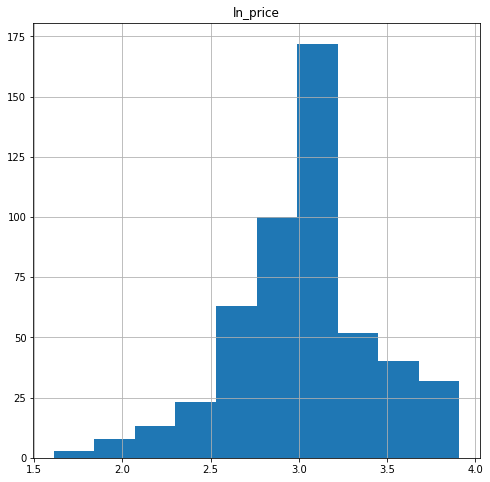

In [10]:
bost.hist(column='ln_price',figsize=(8,8))

In [11]:
X= bost[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat',]]
Y=bost['ln_price']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [13]:
print(X_train.shape)
print(y_train.shape)

(404, 13)
(404,)


In [14]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [15]:
linreg_model = LinearRegression()

In [16]:
linreg_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
pred_linmodel = linreg_model.predict(X_test)

In [18]:
LINEAR = metrics.r2_score(y_test,pred_linmodel)*100
LINEAR

78.81987707719101

# Regularized Linear Regression

In [19]:
# Ridge penalty = L2
# Lasso penalty = L1 
# Elastic net regularization penalty =  both ridge & lasso

In [20]:
#Scaling the dataset


In [21]:
bost_Scaled=bost[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat']]
bost_Scaled.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(bost_Scaled)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
bost_scaled=scaler.transform(bost_Scaled)
bost_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [24]:
scaled_bost= pd.DataFrame(bost_scaled,columns=bost_Scaled.columns)
X1 = scaled_bost
Y1 = bost['ln_price']
print(X1.shape)
print(Y1.shape)

(506, 13)
(506,)


In [25]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,Y1,test_size=0.2,random_state=1)

In [26]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [27]:
las = Lasso(alpha=0.01)
las.fit(X1_train,y1_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
las_pred = las.predict(X1_test)
LAS = metrics.r2_score(las_pred,y1_test)*100

In [29]:
rid = Ridge()
rid.fit(X1_train,y1_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
rid.coef_

array([-0.09030063,  0.03409736,  0.01374925,  0.02263486, -0.10108845,
        0.05161149,  0.01090045, -0.10367463,  0.11767708, -0.08614356,
       -0.08743681,  0.02955485, -0.20694039])

In [31]:
rid_test_pred = pd.DataFrame({'actual':y1_test,'predicted':rid.predict(X1_test)})

In [32]:
RID = metrics.r2_score(rid_test_pred['actual'],rid_test_pred['predicted'])*100

In [33]:
ela = ElasticNet(alpha=0.01)
ela.fit(X1_train,y1_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
ela_pred = ela.predict(X1_test)

In [35]:
ELA = metrics.r2_score(ela_pred,y1_test)*100

# Tuning of Parameters

In [36]:
##Grid Search
#Ridge

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
params_ridge= {'alpha':[1,0.1,0.01,0.001,0.0001,0]}
lasso_params = {'alpha':[1,0.1,0.01,0.001,0.0001,0]}

In [39]:
rid_gs = GridSearchCV(rid,param_grid=params_ridge)

In [40]:
rid_gs.fit(X1_train,y1_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
rid_gs.best_params_

{'alpha': 1}

In [42]:
rid_gs_pred = rid_gs.predict(X1_test)
RID_GS = metrics.r2_score(rid_gs_pred,y1_test)*100

In [43]:
las_gs=GridSearchCV(las,param_grid=lasso_params)

In [44]:
las_gs.fit(X1_train,y1_train)

C:\Users\santhosh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santhosh\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\santhosh\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.111107352096493, tolerance: 0.00551625550738181
  positive)
C:\Users\santhosh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [45]:
las_gs.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
las_gs.best_params_

{'alpha': 0.001}

In [47]:
las_gs_pred=las_gs.predict(X1_test)
LAS_GS = metrics.r2_score(las_gs_pred,y1_test)*100

In [48]:
#ElasticNet
params_ela = {'alpha':[1,0.1,0.01,0.001,0.0001,0],'l1_ratio':[0.1,0.01,0.001,0.0001,1]}

In [49]:
ela_gs = GridSearchCV(ela,param_grid=params_ela)
ela_gs.fit(X1_train,y1_train)

C:\Users\santhosh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\santhosh\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\santhosh\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.111107352096493, tolerance: 0.00551625550738181
  positive)
C:\Users\santhosh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


GridSearchCV(cv=None, error_score=nan,
             estimator=ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0],
                         'l1_ratio': [0.1, 0.01, 0.001, 0.0001, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
ela_gs.best_params_

{'alpha': 0.01, 'l1_ratio': 0.0001}

In [51]:
ela_gs_pred=ela_gs.predict(X1_test)
ELA_GS = metrics.r2_score(ela_gs_pred,y1_test)*100

# Random Search

In [52]:
#Ridge
from sklearn.model_selection import RandomizedSearchCV

In [53]:
ridge_params = {'alpha':uniform(0.0001,1)}
lasso_params = {'alpha':uniform(0.0001,1)}

In [54]:
rid_rs = RandomizedSearchCV(rid,param_distributions=ridge_params,n_iter=100)
las_rs = RandomizedSearchCV(las,param_distributions=lasso_params,n_iter=100)

In [55]:
rid_rs.fit(X1_train,y1_train);
las_rs.fit(X1_train,y1_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000072972CCC88>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [56]:
rid_rs.best_params_;
las_rs.best_params_

{'alpha': 0.004843654283755228}

In [57]:
rid_rs_pred=rid_rs.predict(X1_test)
RID_RS=metrics.r2_score(rid_rs_pred,y1_test)*100

In [58]:
las_rs_pred=las_rs.predict(X1_test)
LAS_RS = metrics.r2_score(las_rs_pred,y1_test)*100

In [59]:
#Elastic net
ela_params = {'alpha':uniform(0.0001,1),'l1_ratio':uniform(0.0001,1)}

In [60]:
ela_rs = RandomizedSearchCV(ela,param_distributions=ela_params,n_iter=100)
ela_rs.fit(X1_train,y1_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ElasticNet(alpha=0.01, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000072972CE688>,
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000072972677C8>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [61]:
ela_rs.best_params_

{'alpha': 0.0002026896413093281, 'l1_ratio': 0.3237459716879365}

In [62]:
ela_rs_pred = ela_rs.predict(X1_test)
ELA_RS = metrics.r2_score(ela_rs_pred,y1_test)*100

# Decision Tree Regressor

In [63]:
from sklearn.tree import DecisionTreeRegressor
import sklearn.tree as skt

In [64]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [65]:
dtr_pred = dtr.predict(X_test)
DTR = metrics.r2_score(dtr_pred,y_test)*100

In [66]:
import graphviz

In [67]:
X_names = X.columns.values
print(X_names)

['crim' 'zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax' 'ptratio'
 'b' 'lstat']


In [68]:
#dot_data = skt.export_graphviz(dtr,out_file=None,max_depth=3,feature_names=X_names,filled=True,rounded=True,special_characters=True)
#graph = graphviz.Source(dot_data)
#graph.render('train_setlinear')

In [69]:
#GridSearch for DecisionTreeRegressor
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
         'max_depth':[2,3,4,5,6,7,8]}

In [ ]:
dtr_gs = GridSearchCV(dtr,param_grid=params)
dtr_gs.fit(X_train,y_train)

In [71]:
dtr_gs.best_params_

{'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 15}

In [72]:
dtr_gs_pred = dtr_gs.predict(X_test)
DTR_GS = metrics.r2_score(dtr_gs_pred,y_test)*100

In [73]:
#Random Search decision tree regressor
dtr_param1 = {'max_features':['auto','sqrt','log2'],'min_samples_split':sp_randint(2,15),
             'min_samples_leaf':sp_randint(1,11),'max_depth':sp_randint(2,8)}

In [74]:
dtr_rs=RandomizedSearchCV(dtr,param_distributions=dtr_param1,n_iter=100)

In [75]:
dtr_rs.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid

In [76]:
dtr_rs.best_params_

{'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 11}

In [77]:
dtr_rs_pred = dtr_rs.predict(X_test)
DTR_RS = metrics.r2_score(dtr_rs_pred,y_test)*100

# KNeighborsRegressor

In [78]:
from sklearn.neighbors import KNeighborsRegressor # for KNN we have to use standarized / scaled dataset 

In [79]:
knn = KNeighborsRegressor()
knn.fit(X1_train,y1_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [80]:
knn_pred = knn.predict(X1_test)
KNN = metrics.r2_score(knn_pred,y1_test)*100

In [81]:
#tuning hyperparameters

In [82]:
#GridSearch CV

knn_param = {'n_neighbors':[5,6,7,8,9],'leaf_size':[1,2,3,5],
             'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}

In [83]:
knn_gs = GridSearchCV(knn,param_grid=knn_param)
knn_gs.fit(X1_train,y1_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 5],
                         'n_neighbors': [5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [84]:
knn_gs_pred = knn_gs.predict(X1_test)
KNN_GS = metrics.r2_score(knn_gs_pred,y1_test)*100

In [85]:
#RandomSearchCV
knn_param1 = {'n_neighbors':sp_randint(5,15),'leaf_size':sp_randint(1,5),
              'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}

In [86]:
knn_rs = RandomizedSearchCV(knn,param_distributions=knn_param1,n_iter=100)
knn_rs.fit(X1_train,y1_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000007298421648>,
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000007298421EC8>,
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n

In [87]:
knn_rs_pred = knn_rs.predict(X1_test)
KNN_RS = metrics.r2_score(knn_rs_pred,y1_test)*100

# Ensemble Models

In [88]:
#Bagging Regressor
from sklearn.ensemble import BaggingRegressor

In [89]:
bag = BaggingRegressor()
bag.fit(X_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [90]:
bag_pred = bag.predict(X_test)
BAG = metrics.r2_score(bag_pred,y_test)*100

In [91]:
#GridsearchCV
bag_param = {'n_estimators':[50,100,200,300],
            'max_features':[1,2,4,6,8],'max_samples':[0.5,0.1],'bootstrap':[True,False],'bootstrap_features':[True,False]}

In [92]:
bag_gs = GridSearchCV(bag,param_grid=bag_param)
bag_gs.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [1, 2, 4, 6, 8],
                         'max_samples': [0.5, 0.1],
                         'n_estimators': [50, 100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [93]:
bag_gs_pred = bag_gs.predict(X_test)
BAG_GS = metrics.r2_score(bag_gs_pred,y_test)*100

In [94]:
#RandomSerachCV
bag_param1 = {'n_estimators':sp_randint(50,300),
            'max_features':sp_randint(1,8),'max_samples':uniform(0.5,0.1),
              'bootstrap':[True,False],'bootstrap_features':[True,False]}

In [95]:
bag_rs = RandomizedSearchCV(bag,param_distributions=bag_param1,n_iter=120)
bag_rs.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=BaggingRegressor(base_estimator=None,
                                              bootstrap=True,
                                              bootstrap_features=False,
                                              max_features=1.0, max_samples=1.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
                   iid='deprecated', n_iter=120, n_jobs=None,
                   param_distributions={'bootstrap': [True, False],
                                        'bootstrap_...
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000729851CE48>,
                                        'max_samples': <scipy.stats._distn_i

In [96]:
bag_rs_pred = bag_rs.predict(X_test)
BAG_RS = metrics.r2_score(bag_rs_pred,y_test)*100

# Random Forest Regressor

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [99]:
rf_pred = rf.predict(X_test)
RF = metrics.r2_score(rf_pred,y_test)*100

In [100]:
#GridSearchCV
rf_param = {'max_depth':[3,5,6,7,8,9],'max_features':['auto','sqrt','log2'],
            'min_samples_split':[2,3,5,7],'min_samples_leaf':[1,3,5,7]}

In [101]:
rf_gs = GridSearchCV(rf,param_grid=rf_param)
rf_gs.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [102]:
rf_gs_pred = rf_gs.predict(X_test)
RF_GS = metrics.r2_score(rf_gs_pred,y_test)*100

In [103]:
#RandomizedSearchCV
rf_param1 ={'max_depth':sp_randint(3,9),'max_features':['auto','sqrt','log2'],
            'min_samples_split':sp_randint(2,7),'min_samples_leaf':sp_randint(1,7)}

In [1]:
#rf_rs = RandomizedSearchCV(rf,param_distributions=rf_param1,n_iter=100)
#rf_rs.fit(X_train,y_train)

In [ ]:
rf_rs_pred = rf_rs.predict(X_test)
RF_RS = metrics.r2_score(rf_rs_pred,y_test)*100

# AdaBoost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada = AdaBoostRegressor()
ada.fit(X_train,y_train)

In [ ]:
ada_pred = ada.predict(X_test)
ADA = metrics.r2_score(ada_pred,y_test)*100

In [ ]:
#GridSearchCV
ada_param = {'learning_rate':[0.05,0.1,0.2,0.6,0.8,1],
            'n_estimators':[50,60,100,200], 'loss':['linear','square','exponential']}

In [ ]:
ada_gs = GridSearchCV(ada,param_grid=ada_param)
ada_gs.fit(X_train,y_train)

In [ ]:
ada_gs_pred = ada_gs.predict(X_test)
ADA_GS = metrics.r2_score(ada_gs_pred,y_test)*100

In [ ]:
#RandomizedSeachCV
ada_param1 = {'learning_rate':uniform(0.05,1),
            'n_estimators':sp_randint(50,200), 'loss':['linear','square','exponential']}

In [ ]:
ada_rs = RandomizedSearchCV(ada,param_distributions=ada_param1,n_iter=100)
ada_rs.fit(X_train,y_train)

In [ ]:
ada_rs_pred = ada_rs.predict(X_test)
ADA_RS = metrics.r2_score(ada_rs_pred,y_test)*100

# Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

In [ ]:
gbr_pred = gbr.predict(X_test)
GBR =metrics.r2_score(gbr_pred,y_test)*100

In [ ]:
#GridSearchCV
gbr_param1 = {'max_depth':[3,5,6,7],'max_features':['auto','sqrt','log2'],
              'min_samples_split':[2,3,10],'min_samples_leaf':[1,3,10],
              'learning_rate':[0.05,0.1,0.2],'n_estimators':[10,30,50,70,90]}

In [ ]:
gbr_gs = GridSearchCV(gbr,param_grid=gbr_param1)
gbr_gs.fit(X_train,y_train)

In [ ]:
gbr_gs_pred = gbr_gs.predict(X_test)
GBR_GS =metrics.r2_score(gbr_gs_pred,y_test)*100

In [ ]:
#RandomizedSearchCV
gbr_param1 = {'max_depth':sp_randint(3,7),'max_features':['auto','sqrt','log2'],
              'min_samples_split':sp_randint(2,10),'min_samples_leaf':sp_randint(1,10),
              'learning_rate':uniform(0.05,0.2),'n_estimators':sp_randint(10,90)}

In [ ]:
gbr_rs = RandomizedSearchCV(gbr,param_distributions=gbr_param1,n_iter=100)
gbr_rs.fit(X_train,y_train)

In [ ]:
gbr_rs_pred = gbr_rs.predict(X_test)
GBR_RS = metrics.r2_score(gbr_rs_pred,y_test)*100

# XgBoost Regressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgbr = XGBRegressor()
xgbr.fit(X_train,y_train)

In [ ]:
xgbr_pred = xgbr.predict(X_test)
XGBR = metrics.r2_score(xgbr_pred,y_test)*100

In [ ]:
#GridSearchCV
xgbr_param = {'max_depth':[3,4,5,6,7,8],'min_child_weight':[4,5,6,7,8],
              'learning_rate':[0.05,0.1,0.2,0.25,0.8,1],'n_estimators':[10,30,50,70,80,100]}

In [ ]:
xgbr_gs = GridSearchCV(xgbr,param_grid=xgbr_param)
xgbr_gs.fit(X_train,y_train)

In [ ]:
xgbr_gs_pred = xgbr_gs.predict(X_test)
XGBR_GS = metrics.r2_score(xgbr_gs_pred,y_test)*100

In [ ]:
#RandomizedSerachCV
xgbr_param1 = {'max_depth':sp_randint(3,10),'min_child_weight':sp_randint(4,8),
              'learning_rate':uniform(0.05,1),'n_estimators':sp_randint(10,100)}

In [ ]:
xgbr_rs = RandomizedSearchCV(xgbr,param_distributions=xgbr_param1,n_iter=150)
xgbr_rs.fit(X_train,y_train)

In [ ]:
xgbr_rs_pred = xgbr_rs.predict(X_test)
XGBR_RS = metrics.r2_score(xgbr_rs_pred,y_test)*100

In [ ]:
LinearRegressioMetrics = {'algorithm':['LINEAR','XGBR','XGBR_GS','XGBR_RS','GBR','GBR_RS',
                                       'GBR_GS','ADA','ADA_GS','ADA_RS','RF','RF_GS','RF_RS',
                                      'BAG','BAG_GS','BAG_RS','KNN','KNN_GS','KNN_RS',
                                      'DTR','DTR_GS','DTR_RS','ELA','ELA_GS','ELA_RS','LAS','LAS_GS','LAS_RS',
                                      'RID','RID_GS','RID_RS'],
                         'Metrics':[LINEAR,XGBR,XGBR_GS,XGBR_RS,GBR,GBR_RS,
                                       GBR_GS,ADA,ADA_GS,ADA_RS,RF,RF_GS,RF_RS,
                                      BAG,BAG_GS,BAG_RS,KNN,KNN_GS,KNN_RS,
                                      DTR,DTR_GS,DTR_RS,ELA,ELA_GS,ELA_RS,LAS,LAS_GS,LAS_RS,
                                      RID,RID_GS,RID_RS]}

In [ ]:
LRMetrics = pd.DataFrame(LinearRegressioMetrics,columns=['algorithm','Metrics'])

In [ ]:
LRM_sort = LRMetrics.sort_values('Metrics',ascending=False)
print(LRM_sort)